<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Tesla_Stock_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [18]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 87 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638689 sha256=e175c9c595b1a3d803d55b16215e997babfee0cbf0f6f5a06fa2caed517a40bd
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet


In [19]:
from fbprophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()


In [10]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TSLA.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-22,834.130005,856.729980,801.099976,821.530029,821.530029,27762700
1,2022-02-23,830.429993,835.299988,760.559998,764.039978,764.039978,31752300
2,2022-02-24,700.390015,802.479980,700.000000,800.770020,800.770020,45107400
3,2022-02-25,809.229980,819.500000,782.400024,809.869995,809.869995,25355900
4,2022-02-28,815.010010,876.859985,814.710022,870.429993,870.429993,33002300


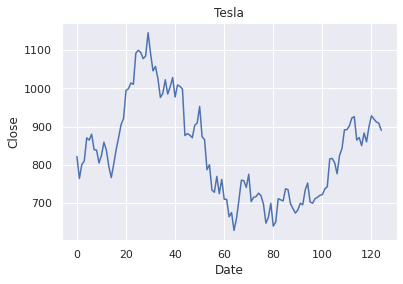

In [11]:
close = data['Close'] 
ax = close.plot(title='Tesla') 
ax.set_xlabel('Date')
ax.set_ylabel('Close') 
plt.show()

In [13]:
data["Date"] = pd.to_datetime(data["Date"], infer_datetime_format = True) 
data = data[["Date", "Close"]]

In [14]:
data = data.rename(columns={"Date":"ds", "Close":"y"})

In [22]:
model = Prophet() 
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
485,2023-08-15,2345.003722,167.321593,4639.396040
486,2023-08-16,2350.167700,202.931856,4664.083655
487,2023-08-17,2354.662272,202.115796,4704.836999
488,2023-08-18,2357.429643,141.314792,4691.591190
489,2023-08-19,2372.468050,132.809314,4693.461216


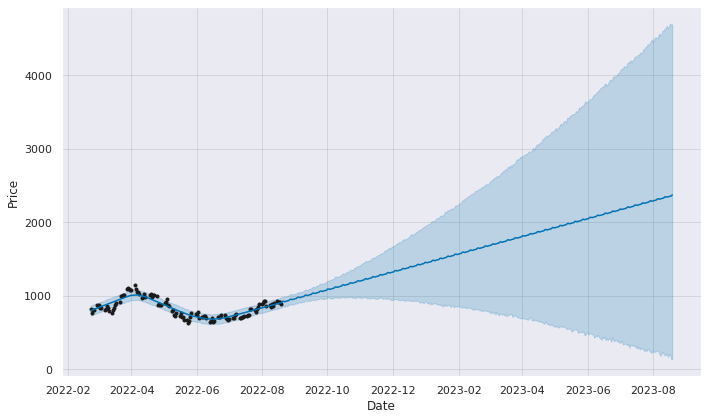

In [23]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price")